## ANALYSING SOCIAL PATTERNS TO PREDICT PERSONALITY:INTROVERT VS EXTROVERT

IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\personality_dataset.csv")

 DATA CLEANING

In [7]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                'Friends_circle_size', 'Post_frequency']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [9]:
df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])


In [10]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

In [11]:
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

EXPLORATORY DATA ANALYSIS

### Boxplot for key numeric features

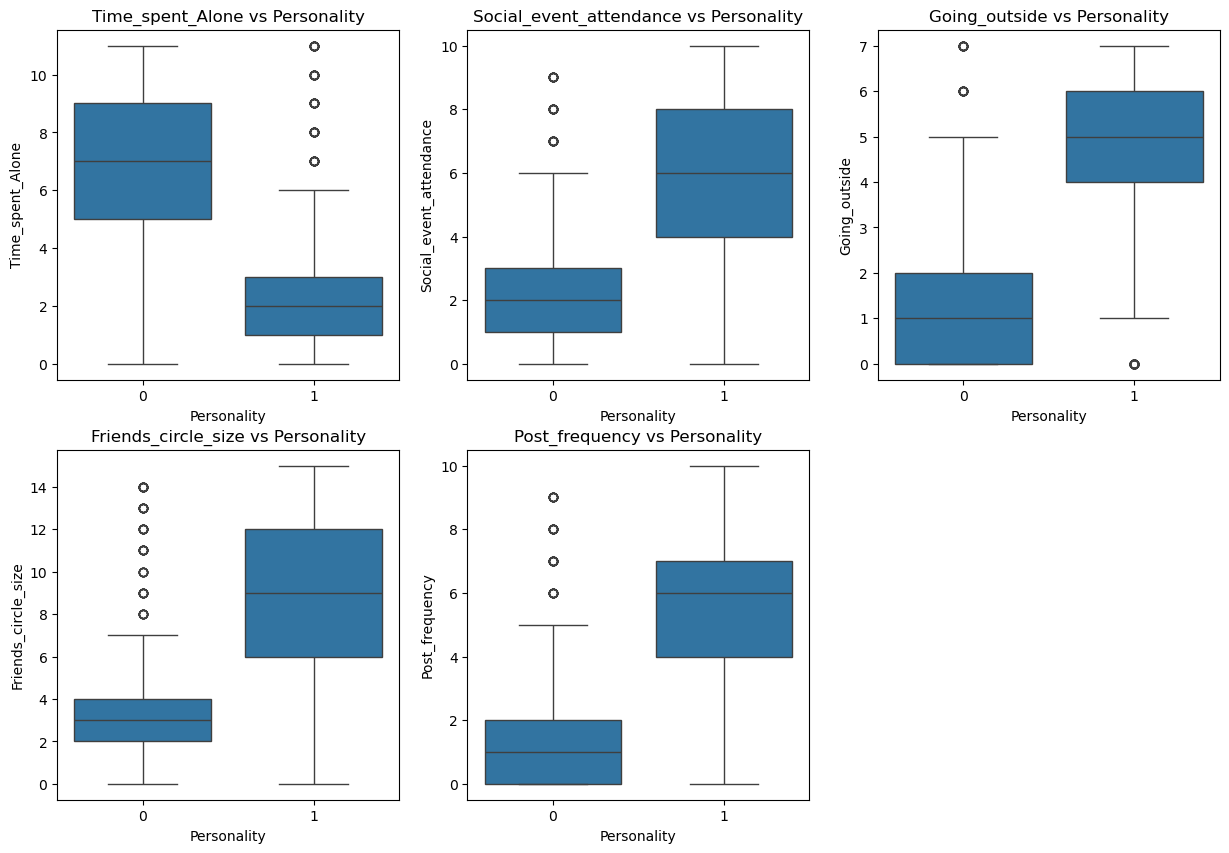

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} vs Personality')


## Boxplot Analysis: Personality vs Social Features

The following boxplots compare Introverts (0) and Extroverts (1) across various behavioral features:

1. **Time_spent_Alone vs Personality**
   - Introverts tend to spend significantly more time alone.
   - Extroverts have lower median values in this category.

2. **Social_event_attendance vs Personality**
   - Extroverts attend more social events on average.
   - Distribution is wider for extroverts, indicating varied social behavior.

3. **Going_outside vs Personality**
   - Extroverts go outside more frequently.
   - Introverts show a low median with limited variation.

4. **Friends_circle_size vs Personality**
   - Extroverts generally have a larger circle of friends.
   - Introverts show smaller friend circles with less spread.

5. **Post_frequency vs Personality**
   - Extroverts tend to post more frequently on social platforms.
   - Introverts show consistently lower post frequencies.

### Summary:
These plots visually confirm common psychological expectations — extroverts are more socially active, have larger friend groups, and engage more frequently in both in-person and online interactions. Meanwhile, introverts prefer solitude and engage less in social settings.

This supports the hypothesis that social behavior metrics can effectively predict personality type.


### Heatmap for correlation

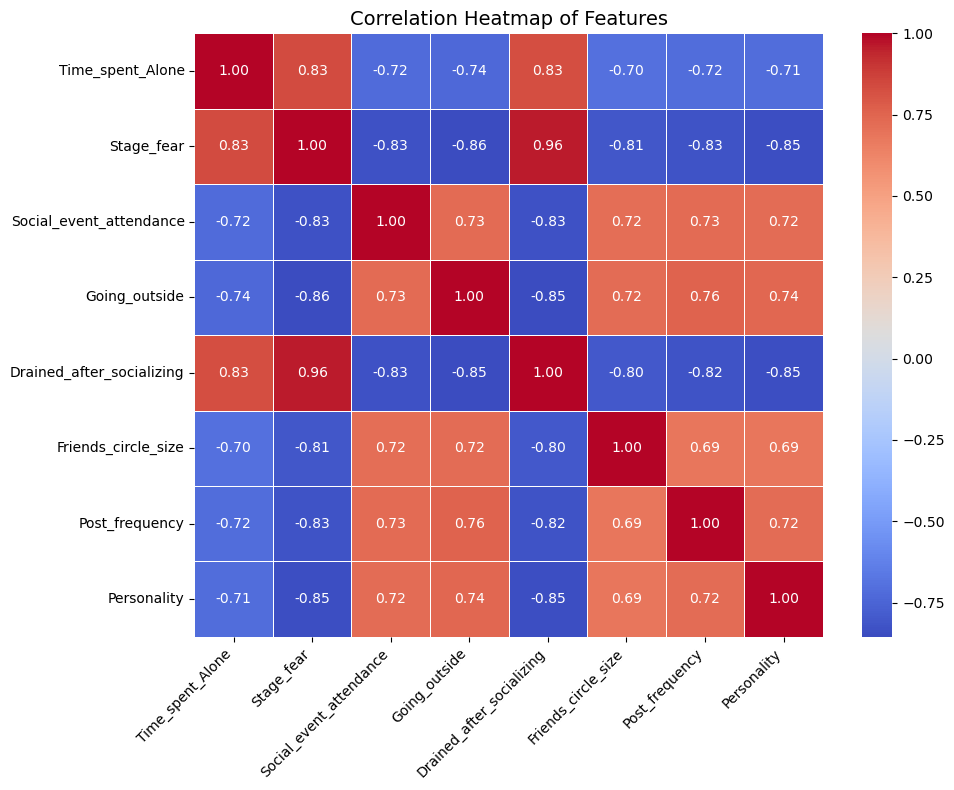

In [22]:
plt.figure(figsize=(10, 8))  # Set a larger figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Correlation Heatmap Analysis

The correlation heatmap reveals valuable insights into how social behavior features relate to each other and to the target variable (`Personality`).

### Key Observations:
- **Strong Positive Correlations**:
  - `Friends_circle_size`, `Post_frequency`, `Going_outside`, and `Social_event_attendance` show high positive correlation with `Personality` — indicating extroverted behavior.
  - `Stage_fear` and `Drained_after_socializing` are also highly correlated with each other (r ≈ 0.96), suggesting these traits frequently co-occur.

- **Strong Negative Correlations**:
  - `Time_spent_Alone`, `Stage_fear`, and `Drained_after_socializing` are negatively correlated with `Personality`, reinforcing typical introvert characteristics.

- **Inter-Feature Relationships**:
  - Features like `Time_spent_Alone` are inversely related to social activity metrics (e.g., event attendance and post frequency), highlighting behavioral trade-offs.

### Insight:
These correlation patterns support the hypothesis that social interaction metrics are strong predictors of personality type and also show consistent internal behavioral relationships.


MODEL BUILDING

In [21]:
X = df.drop('Personality', axis=1)
y = df['Personality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Confusion matrix

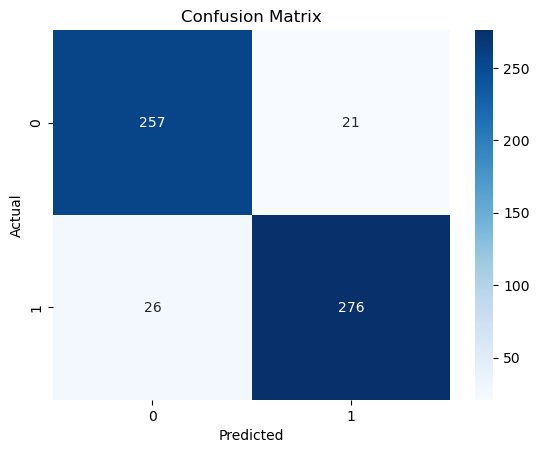

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Confusion Matrix Analysis

The confusion matrix illustrates the classification performance of the Random Forest model:

- **True Positives (Extroverts correctly identified)**: 276
- **True Negatives (Introverts correctly identified)**: 257
- **False Positives (Introverts misclassified as Extroverts)**: 21
- **False Negatives (Extroverts misclassified as Introverts)**: 26

###  Insight:
The model achieves high accuracy (~91.9%) and demonstrates strong predictive power for both personality classes. The balance between true positives and true negatives suggests the model is not biased toward either class, making it reliable for personality prediction based on social behavior.


In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       278
           1       0.93      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



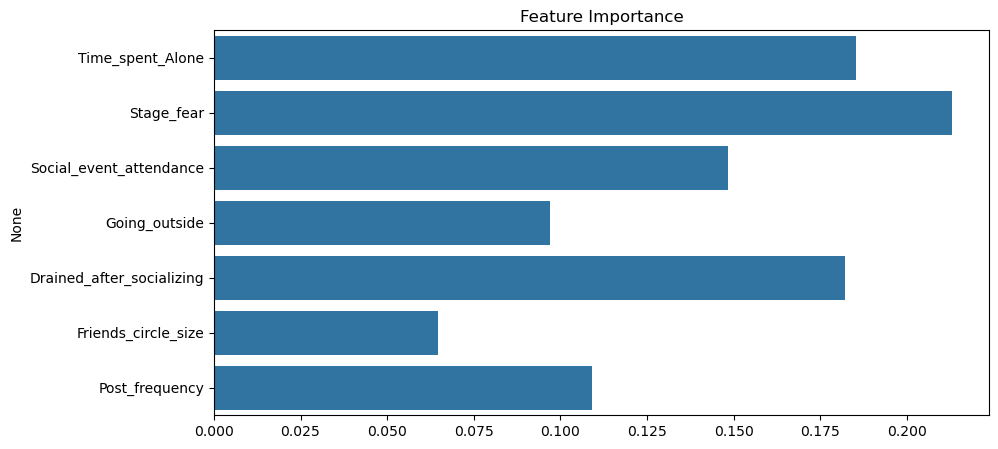

In [20]:
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.show()

## Feature Importance Analysis

The Random Forest model identifies the following features as the most important for predicting personality type:

- **Stage Fear** and **Time Spent Alone** are the strongest indicators of introversion vs. extroversion.
- **Feeling Drained After Socializing** is also highly predictive.
- Social activity metrics like `Event Attendance`, `Going Outside`, and `Post Frequency` contribute meaningfully but less strongly.
- Interestingly, `Friends Circle Size`, while relevant, carries lower weight in the model’s decision-making.

### Insight:
The model confirms that internal psychological factors (fear, energy drain, solitude preference) are stronger predictors of personality than external social metrics alone — providing a nuanced view of personality prediction.
|

# Overall Project Summary: Analyzing Social Patterns to Predict Personality

In this project, we explored how social behavior patterns can predict an individual's personality type — **Introvert** vs. **Extrovert** — using a Random Forest classification model.

---

## Key Steps:

1. **Data Cleaning**:
   - Handled missing values with median and mode imputation.
   - Encoded categorical variables.
   - Standardized features for better model performance.

2. **Exploratory Data Analysis (EDA)**:
   - Visualized feature distributions using boxplots.
   - Correlation heatmap revealed strong relationships between social behaviors and personality type.

3. **Model Training**:
   - Trained a Random Forest classifier.
   - Achieved **~91.9% accuracy** on the test set.
   - Balanced performance across both introverts and extroverts.

4. **Model Evaluation**:
   - Confusion matrix confirmed low misclassification rates.
   - Classification report showed strong precision and recall for both classes.

5. **Feature Importance**:
   - The most important predictors were:
     - `Stage Fear`
     - `Time Spent Alone`
     - `Feeling Drained After Socializing`
   - Social activity metrics also contributed but were slightly less impactful.

---

## Final Insights:

- **Internal psychological traits** (such as stage fear and social fatigue) are stronger indicators of personality type than external social behaviors alone.
- Social interaction patterns like event attendance, posting frequency, and friend circle size still play an important role.
- The model demonstrates that personality can be effectively predicted based on observable behavior — useful for applications in psychology, HR screening, and digital wellness.

---

## Conclusion:

This project confirms that **analyzing social patterns is a viable and effective method for predicting personality types**.  
It also highlights which behaviors are the most telling, providing actionable insights for future research or applications.

